# Recreate CNN architectures with fast.ai

In this excercise, we will recreate popular CNN architectures with the fast.ai libary.

For the beginning you should start with a more simple Network, the VGG-16. Please refer to this [Paper](https://arxiv.org/pdf/1409.1556.pdf) from Simonyan and Zisserman.



In [12]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *



We start with an example for a simple two layer Network:


In [0]:
class TwoLayerNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = F.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred


In [0]:
model_1 = TwoLayerNet(1000, 100, 10)

The next example is a simple CNN model. Note, that we give as input a list with variable layer number.


In [0]:
class SimpleNet(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList([
            nn.Linear(layers[i], layers[i + 1]) for i in range(len(layers) - 1)])
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        for l in self.layers:
            l_x = l(x)
            x = F.relu(l_x)
        return l_x

In [0]:
model_2 = SimpleNet([32*32*3, 40, 10])
model_3 = SimpleNet([32*32*3, 20, 4010])

There is also a more convenient way to define your model with nn.Sequential() instead of creating a new class. However, you are not able to customize the forward method or chossing a flexible number of layers using this function.

In [0]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1) #define function to have fix hyper-paramters for our filters


In [0]:
model_4 = nn.Sequential(
    conv(1, 8),
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10),
    nn.BatchNorm2d(10),
    Flatten()    
)

# Now your turn!

Recreate the VGG-16 Network.
This diagram of the architecture should help you:
![VGG-16 architecture](https://miro.medium.com/max/605/1*E7zhhan7Sp7hats4jkKdeA.png)

![alt text](https://qph.fs.quoracdn.net/main-qimg-83c7dee9e8b039c3ca27c8dd91cacbb4)

As training data you can try the MNIST

In [0]:
path = untar_data(URLs.MNIST)


In [22]:
path.ls()


[PosixPath('/root/.fastai/data/mnist_png/testing'),
 PosixPath('/root/.fastai/data/mnist_png/training')]

In [0]:
il = ImageList.from_folder(path, convert_mode='L') #get labels from folder names

In [24]:
il.items[0]


PosixPath('/root/.fastai/data/mnist_png/testing/9/9530.png')

In [0]:
defaults.cmap='binary'


In [26]:
il


ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /root/.fastai/data/mnist_png

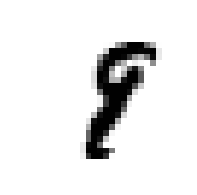

In [27]:
il[0].show()


In [0]:
sd = il.split_by_folder(train='training', valid='testing') #split data into training and validation sets
ll = sd.label_from_folder()

In [0]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])
ll = ll.transform(tfms)


In [0]:
bs = 128
data = ll.databunch(bs=bs).normalize()
